![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Agrupando por la estación (season) se puede ver que la mayoría de prestamos se hacen en la estación 3 que acorde a la documentación corresponde al verano, en tanto que la menor cantidad ocurriria en invierno, esto puede ser entendible teniendo en cuenta las condiciones climaticas de cada estación. En cuanto a la hora se puede ver que en la mañana se ve un aumento de registros a las 8 y en la tarde-noche la mayor cantidad de prestamos se hacen alrededor de las 17 y 18 horas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

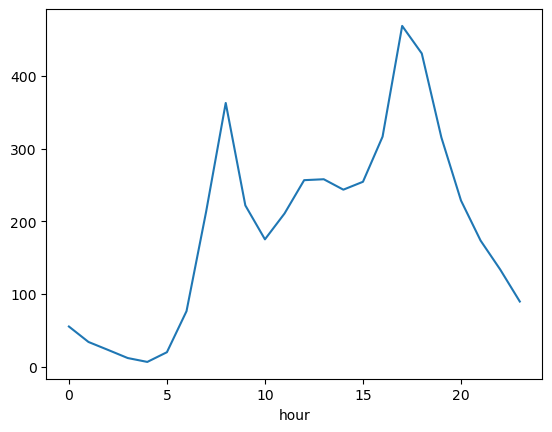

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

Con la primera gráfica se puede visualizar el promedio de prestamos a lo largo de las horas del día, permitiendo ver los picos a las 7-8 y a las 17-18 aproximadamente.

<AxesSubplot:xlabel='hour'>

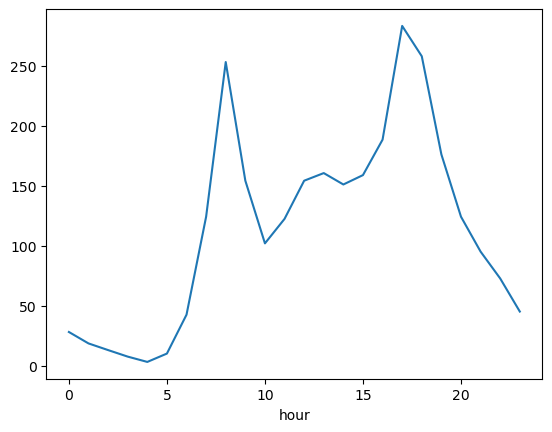

In [7]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bs1 = bikes[bikes['season']==1] 
bs1.groupby('hour').total.mean().plot()

La estación 1 corresponde al invierno, que del punto anterior habiamos visto que corresponde a la estación con menor cantidad de prestamos. En la gráfica se puede ver un comportamiento similar al de la gráfica general de prestamos según la hora, con picos alrededor de las 8 y las 17-18 horas. 

<AxesSubplot:xlabel='hour'>

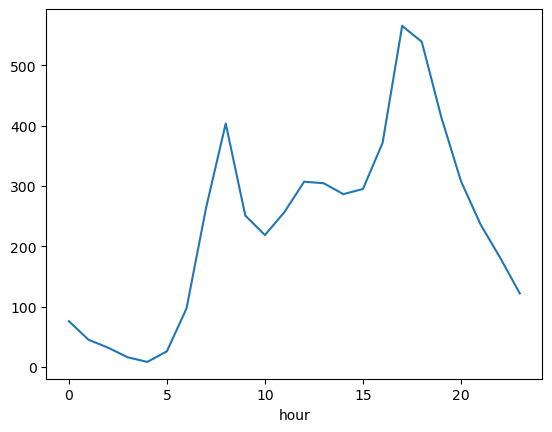

In [8]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bs3 = bikes[bikes['season']==3] 
bs3.groupby('hour').total.mean().plot()

Similar a la gráfica anterior, se ven la misma tendencia de picos alrededor de las 8 y las 17-18 horas, pero la diferencia se ve en la cantidad de prestamos, siendo casi el doble en verano versus el invierno. En invierno, a las 8 se tiene alrededor de 250 prestamos mientras que en verano este numero es cercano a 400 prestamos. Así mismo, en las horas de la tarde en invierno el pico promedio de prestamos es de aproximadamente 300 mientras que en verano es de casi 600. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [9]:
# Celda 3
#se hace la seleccion de las variables de interés
xTotal = bikes.filter(["season", "hour"], axis = 1)
yTotal = bikes.filter(["total"], axis = 1)
#se crean variables dummies para la codificacion de la variable categorica

dummies = pd.get_dummies(xTotal['season'],prefix='season')
xTotal = pd.concat([xTotal, dummies], axis=1)

In [10]:
#se borran las variables season y la dummie season_4 ya que si las otras dummies season son cero siginifica que la estacion es la 4 ()
xTotal = xTotal.drop(["season","season_4"], axis = 1)  

In [11]:
#se estima el modelo
modeloLR = LinearRegression()
modeloLR.fit(xTotal, yTotal)


LinearRegression()

In [12]:
#coeficientes
modeloLR.coef_

array([[ 10.54520609, -84.08311787,  16.23411404,  35.38443207]])

In [ ]:
#1:winter, 2:spring, 3:summer, 4:fall

Al haber modelado sin la variable dummie que representaba el otoño, las interpretaciones se hacen con respecto a esta estación y los prestamos en esta estación. Así, si empezamos asumiendo que en el lugar es otoño por cada hora que pase en el día se aumentan aproximadamente 10 prestamos. Por otro lado, si asumimos una hora del día fija, si la estación es invierno la cantidad de prestamos disminuye aproximadamente en 84 con respecto al otoño, aumentaria en 16 si es primavera y en 35 si es verano.

Lo anterior tiene sentido si uno piensa que en invierno sera mucho menor la cantidad de prestamos por el clima y por otro lado verano es la epoca en que mayor cantidad de prestamos se dan, lo cual concuerda con los datos descriptivos analizados en la primera parte.

En este caso teniendo en cuenta la presencia de la variable categórica se debe tener cuidado en la interpretación y validación de los resultados. Por un lado como ya se vio, la interpretación se puede hacer con las variables dummies sin embargo, para las pruebas de hipótesis se deben buscar directamente si la estación es siginificativa estadisticamente para la estimación de la cantidad de prestamos de bicicletas. 

In [14]:
modeloLR.score(xTotal, yTotal, sample_weight=None)

0.22339339904452493

Con el R2 se estima la cantidad de variabilidad explicada con las variables predictoras, y al ser 22% se podria pensar que este modelo no es el mas acertado para la predicción.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [16]:
#se hace la seleccion de las variables de interés
xTotal = bikes.filter(["season", "hour"], axis = 1)
yTotal = bikes.filter(["total"], axis = 1)
#se crean variables dummies para la codificacion de la variable categorica
xTotal['season'] = pd.factorize(xTotal.season)[0]

In [15]:
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [21]:
# Impresión variable a usar
j = 1
print(xTotal.columns[j])

hour


In [22]:
# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(xTotal.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [23]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = xTotal.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = yTotal.loc[filter_l]
y_r = yTotal.loc[~filter_l]

In [34]:
y_l

,total
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 07:00:00,363
2012-12-19 08:00:00,678
2012-12-19 09:00:00,317


In [24]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [29]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

total   -27775.883008
dtype: float64

In [30]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

total   -138889.233968
dtype: float64

In [31]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [33]:
# Ganancia de la variable 'Hits' en el punto de corte selecionado
gini_impurity(xTotal.iloc[:, j], yTotal, splits[k])

total    10610.41358
dtype: float64

In [26]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [27]:
# Celda 4
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree


In [28]:
# Aplicación de la función tree_grow
tree_grow(xTotal, yTotal, level=0, min_gain=0.001, max_depth=6, num_pct=10)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [ ]:
#se hace la seleccion de las variables de interés
xTotal = bikes.filter(["season", "hour"], axis = 1)
yTotal = bikes.filter(["total"], axis = 1)
#se crean variables dummies para la codificacion de la variable categorica
xTotal['season'] = pd.factorize(xTotal.season)[0]

In [ ]:
#se hace la particion en muestras de entrenamiento y validacion
XTrain, XTest, yTrain, yTest = train_test_split(xTotal, yTotal, test_size=0.33, random_state=0)

In [ ]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []


# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10, scoring='accuracy').mean())


In [ ]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [ ]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [ ]:
# max_depth=5 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=5, random_state=1)
clf.fit(XTrain, yTrain)

In [ ]:
prediccion=clf.predict(XTest)
MSE=np.average(np.square(prediccion-yTest.to_numpy().tolist()))
print('MSE arbol con libreria:')
print(MSE) 

In [ ]:
MSE

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la noticia es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

In [ ]:
# División de la muestra en set de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

In [ ]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [ ]:
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clfB = DecisionTreeClassifier(max_depth=2, random_state=1)
clfB.fit(X_train, y_train)

In [ ]:
prediccionTreeB=clfB.predict(X_test)

In [ ]:
metrics.f1_score(prediccionTreeB, y_test), metrics.accuracy_score(prediccionTreeB, y_test)

In [ ]:
clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(X_train,y_train)

In [ ]:
prediccionesRegLog=clfRegLog.predict(X_test)

In [ ]:
prediccionesRegLog

In [ ]:
metrics.f1_score(prediccionesRegLog, y_test), metrics.accuracy_score(prediccionesRegLog, y_test)

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [ ]:
# Celda 7
# Definición del modelo BaggingClassifier de la libreria sklearn

clf7a = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 5), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [ ]:
# Predicción y desempeño 
clf7a.fit(X_train, y_train)
y_pred7a = clf7a.predict(X_test)
metrics.f1_score(y_pred7a, y_test), metrics.accuracy_score(y_pred7a, y_test)

In [ ]:
clf7b = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf = 3), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [ ]:
# Predicción y desempeño 
clf7b.fit(X_train, y_train)
y_pred7b = clf7b.predict(X_test)
metrics.f1_score(y_pred7b, y_test), metrics.accuracy_score(y_pred7b, y_test)

In [ ]:
clf7c = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [ ]:
# Predicción y desempeño 
clf7c.fit(X_train, y_train)
y_pred7c = clf7c.predict(X_test)
metrics.f1_score(y_pred7c, y_test), metrics.accuracy_score(y_pred7c, y_test)

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB para el caso 1
errors = np.zeros(clf7a.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf7a.n_estimators))

for i in range(clf7a.n_estimators):
    oob_sample = ~clf7a.estimators_samples_[i]
    y_pred_ = clf7a.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf7a.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred8a = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)


metrics.f1_score(y_pred8a, y_test), metrics.accuracy_score(y_pred8a, y_test)

In [ ]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB para el caso 2
errors = np.zeros(clf7b.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf7b.n_estimators))

for i in range(clf7b.n_estimators):
    oob_sample = ~clf7b.estimators_samples_[i]
    y_pred_ = clf7b.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf7b.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred8b = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)


metrics.f1_score(y_pred8b, y_test), metrics.accuracy_score(y_pred8b, y_test)

In [ ]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB para el caso 3
errors = np.zeros(clf7c.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf7c.n_estimators))

for i in range(clf7c.n_estimators):
    oob_sample = ~clf7c.estimators_samples_[i]
    y_pred_ = clf7c.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf7c.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred8c = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)


metrics.f1_score(y_pred8c, y_test), metrics.accuracy_score(y_pred8c, y_test)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9